In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import rand_score,silhouette_score,davies_bouldin_score,adjusted_rand_score
import seaborn as sns

/tmp/ipykernel_239765/371391930.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Seed_Data.csv')
df

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [3]:
df.isna().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

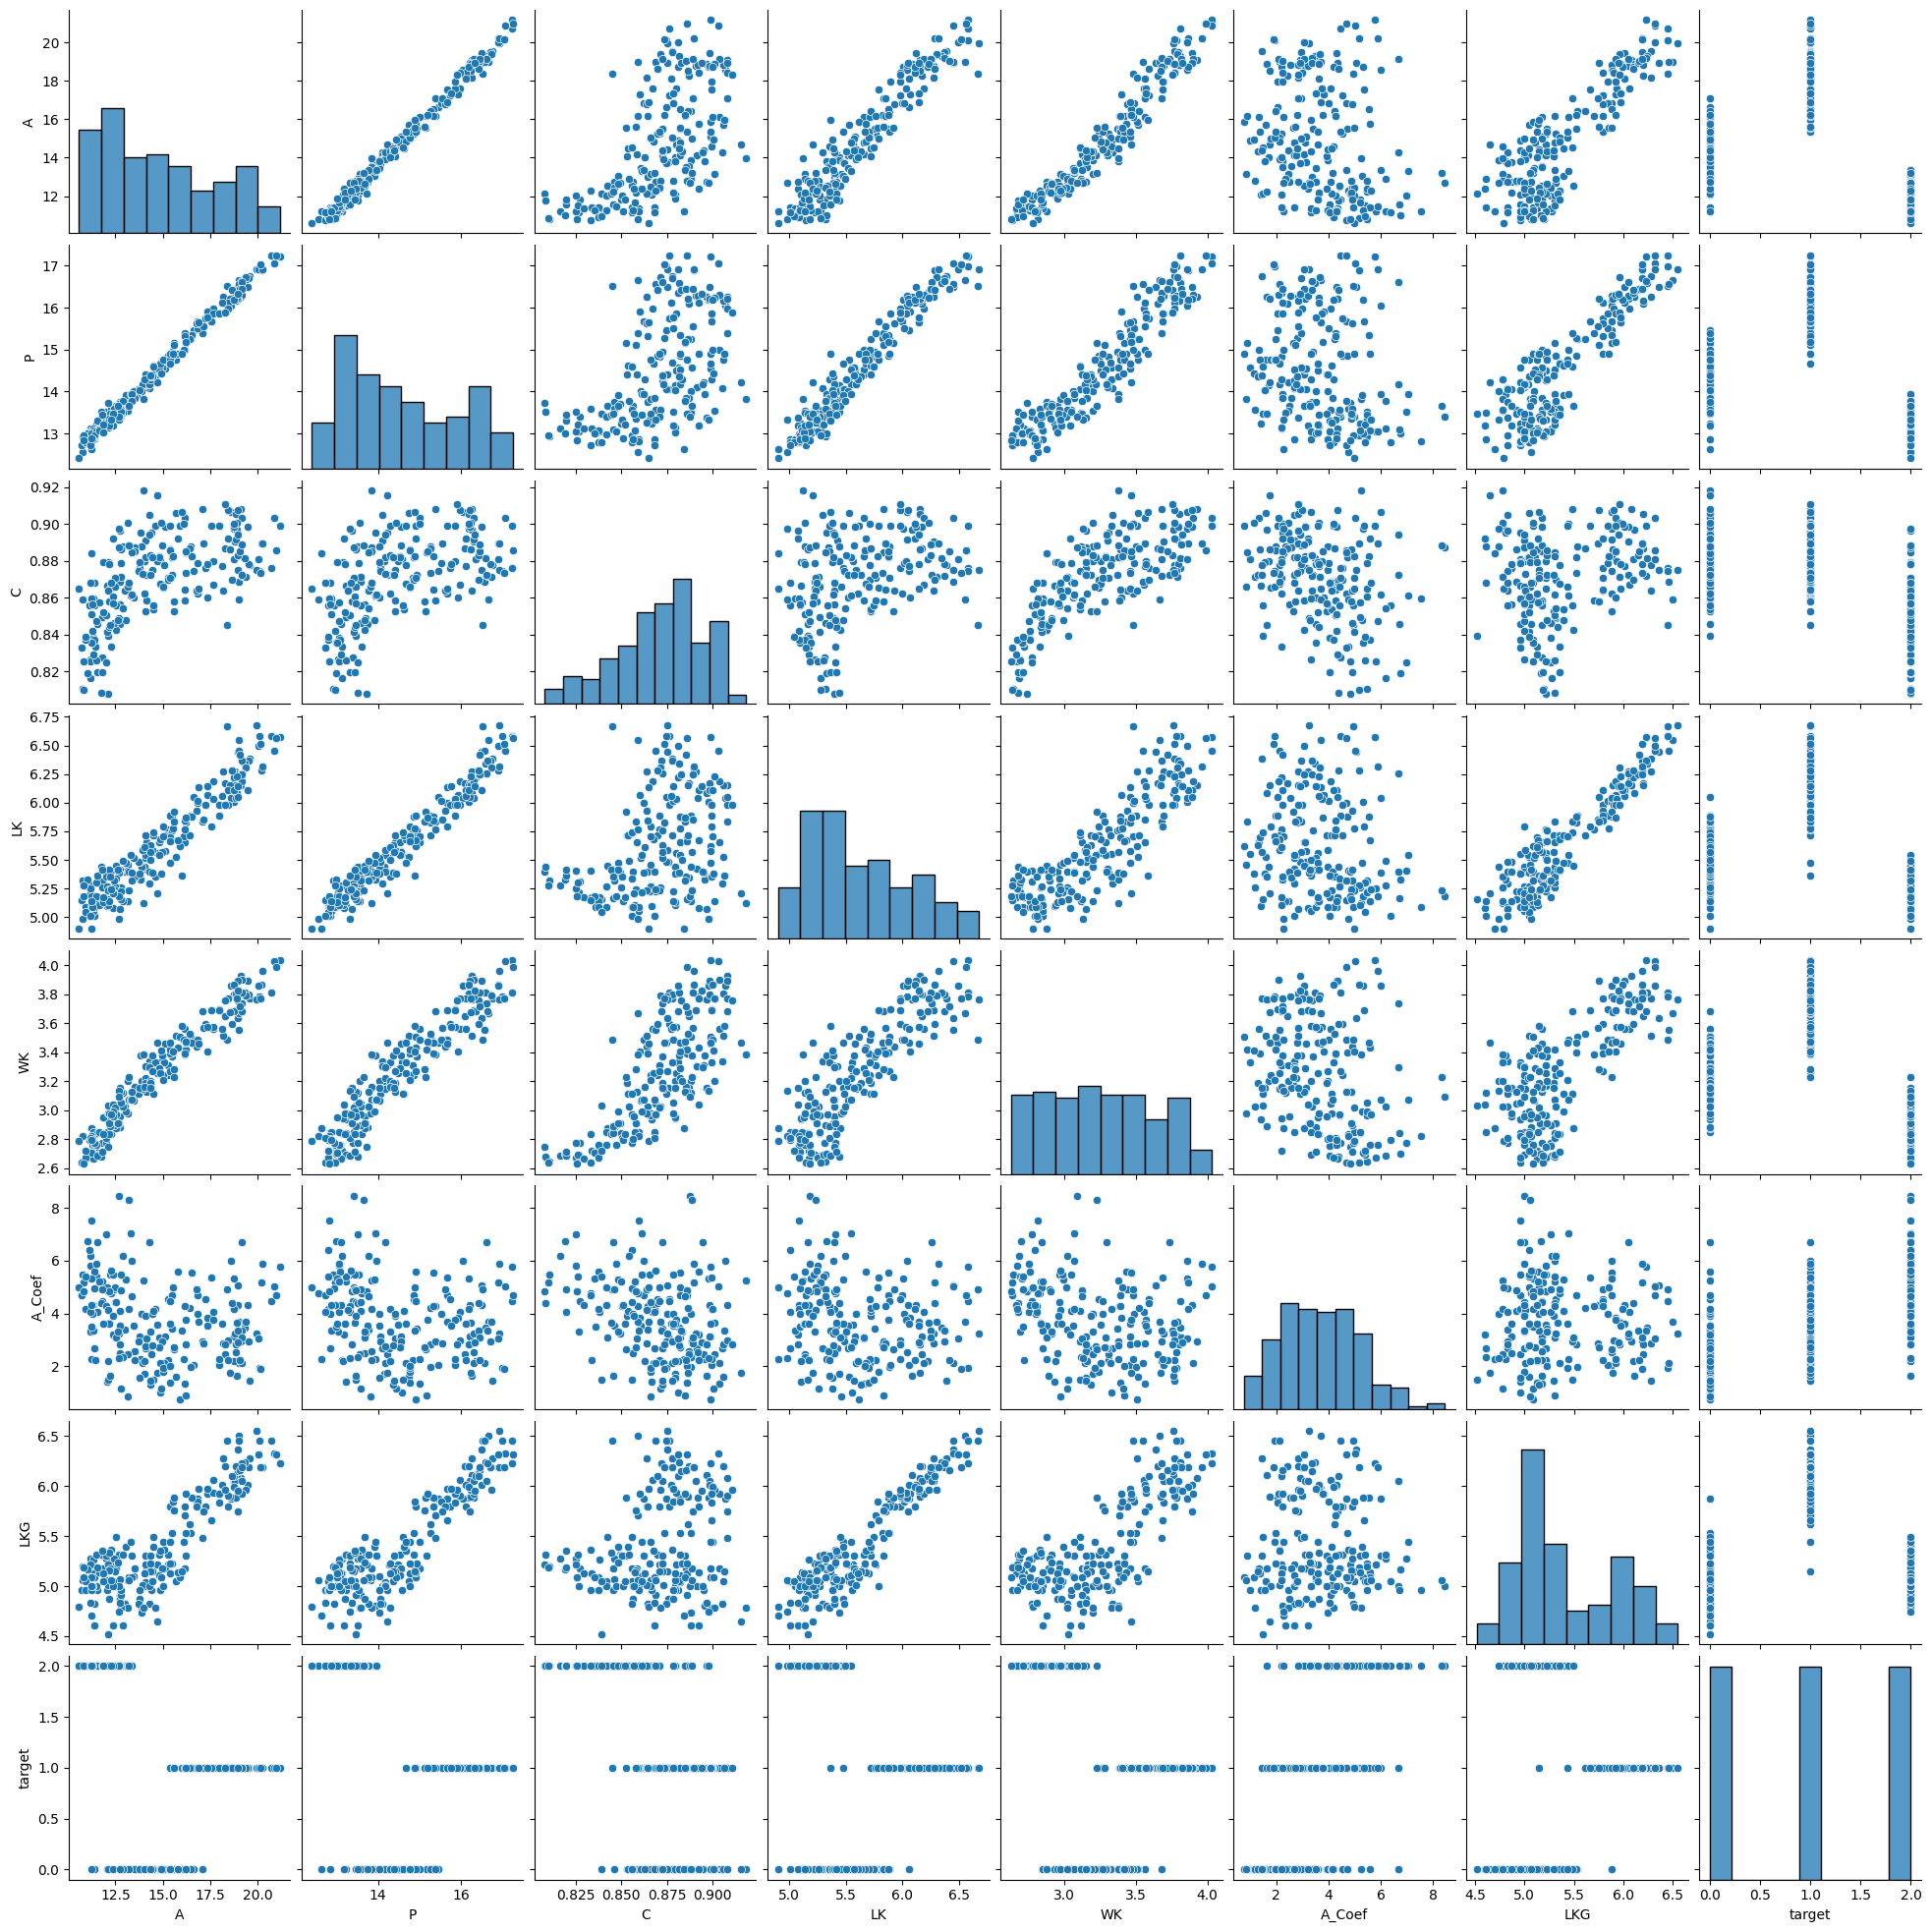

In [5]:
sns.pairplot(df)

## KMeans

In [4]:
k = [3,5,7]

for i in k:
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    df['k_means_'+str(i)] = kmeans.labels_

## KMedoids

In [5]:
for i in k:
    kmedoids = KMedoids(n_clusters=i,random_state=0)
    kmedoids.fit(df)
    df['k_medoids_'+str(i)] = kmedoids.labels_

In [6]:
df.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target,k_means_3,k_means_5,k_means_7,k_medoids_3,k_medoids_5,k_medoids_7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2,2,6,0,2,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2,2,6,0,3,3
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2,2,2,0,3,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2,2,2,0,3,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2,2,6,0,2,3
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0,2,2,2,0,3,0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0,2,2,2,0,3,4
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0,2,2,2,0,3,0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0,2,2,6,0,2,3
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0,2,2,6,0,2,3


K Means Clustering


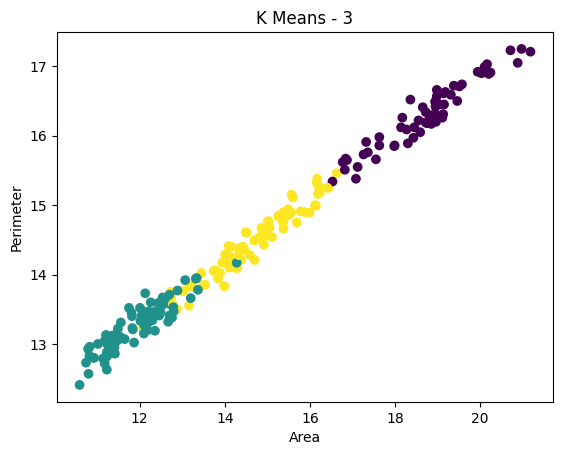


Silhouette Score 0.3482120130050473
Rand Score 0.9070858965595807
Adjusted Rand Score 0.7903760629357317
Davies Bouldin Score 1.3003286053138268


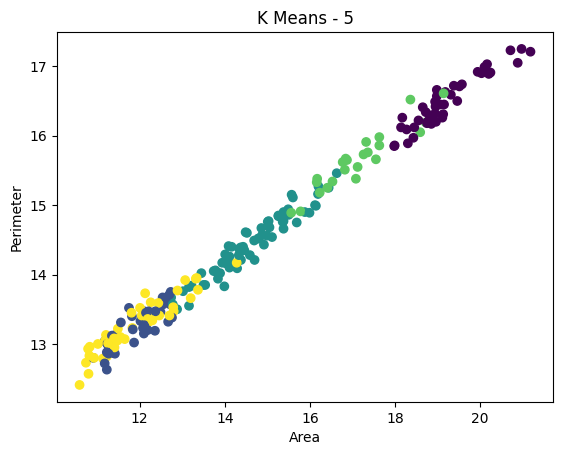


Silhouette Score 0.4715354417933321
Rand Score 0.8330371383002962
Adjusted Rand Score 0.5866301038585279
Davies Bouldin Score 0.9356372340659771


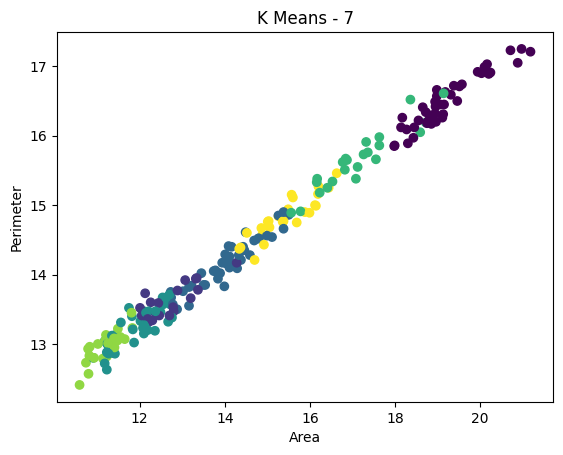


Silhouette Score 0.5690709731108728
Rand Score 0.7873775347459558
Adjusted Rand Score 0.44337733677933133
Davies Bouldin Score 0.7952029415521364


In [7]:
print("K Means Clustering")
for i in k:
    plt.scatter(df['A'],df['P'],c=df['k_means_'+str(i)])
    plt.xlabel('Area')
    plt.ylabel('Perimeter')
    plt.title('K Means - '+str(i))
    plt.show()
    print()
    print('Silhouette Score',silhouette_score(df,df['k_means_'+str(i)]))
    print('Rand Score',rand_score(df['target'],df['k_means_'+str(i)]))
    print('Adjusted Rand Score',adjusted_rand_score(df['target'],df['k_means_'+str(i)]))
    print('Davies Bouldin Score',davies_bouldin_score(df,df['k_means_'+str(i)]))

K Medoids Clustering


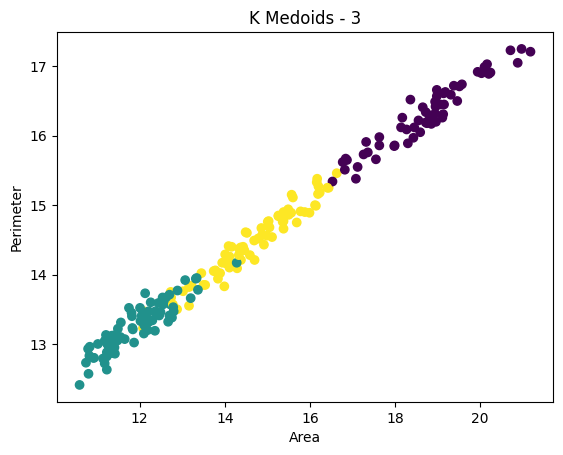


Silhouette Score 0.4010525964404976
Rand Score 0.7256322624743677
Adjusted Rand Score 0.41371810981140883
Davies Bouldin Score 1.103220295350355


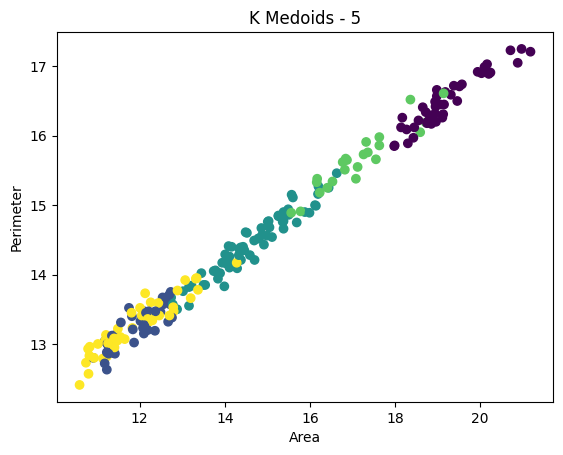


Silhouette Score 0.48258731275668787
Rand Score 0.8091136933242197
Adjusted Rand Score 0.522587762228801
Davies Bouldin Score 1.0245947447739172


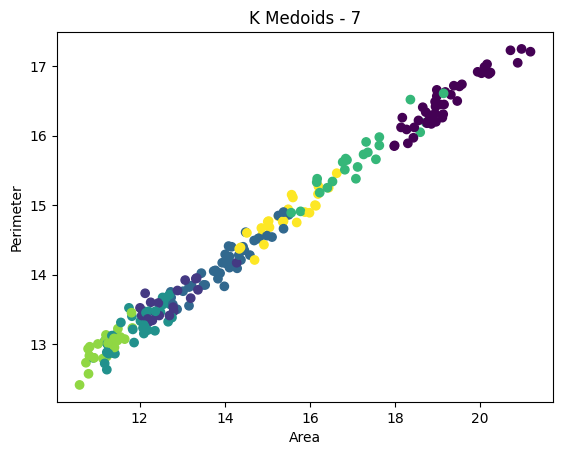


Silhouette Score 0.6130292530012103
Rand Score 0.7878332194121668
Adjusted Rand Score 0.4427183732093586
Davies Bouldin Score 0.5987372627612936


In [8]:
print("K Medoids Clustering")
for i in k:
    plt.scatter(df['A'],df['P'],c=df['k_means_'+str(i)])
    plt.xlabel('Area')
    plt.ylabel('Perimeter')
    plt.title('K Medoids - '+str(i))
    plt.show()
    print()
    print('Silhouette Score',silhouette_score(df,df['k_medoids_'+str(i)]))
    print('Rand Score',rand_score(df['target'],df['k_medoids_'+str(i)]))
    print('Adjusted Rand Score',adjusted_rand_score(df['target'],df['k_medoids_'+str(i)]))
    print('Davies Bouldin Score',davies_bouldin_score(df,df['k_medoids_'+str(i)]))

## Hierarchial Clustering and DBSCAN

In [9]:
h = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [10]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
X = df.iloc[:,[3,4]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
h_cluster = h.fit_predict(X_scaled)
dbscan_cluster = dbscan.fit_predict(X_scaled)

In [13]:
print("Hierarchial Clustering")
print("Silhouette Score: ",silhouette_score(X,h_cluster))
print("Davies Bouldin Score: ",davies_bouldin_score(X,h_cluster))

Hierarchial Clustering
Silhouette Score:  0.5529945955148897
Davies Bouldin Score:  0.5782207452369453


In [14]:
print("DBSCAN Clustering")
print("Silhouette Score: ",silhouette_score(X,dbscan_cluster))
print("Davies Bouldin Score: ",davies_bouldin_score(X,dbscan_cluster))

DBSCAN Clustering
Silhouette Score:  0.35070898426844344
Davies Bouldin Score:  0.8222341115673952


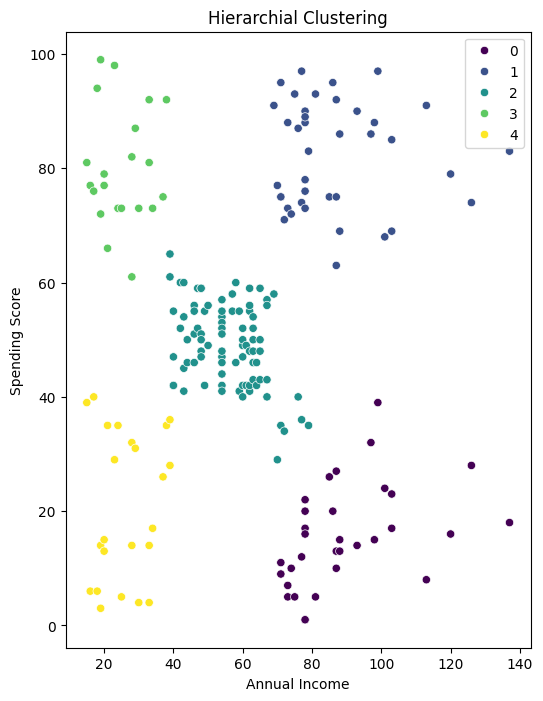

In [15]:
plt.figure(figsize=(6,8))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=h_cluster,palette="viridis")
plt.title("Hierarchial Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

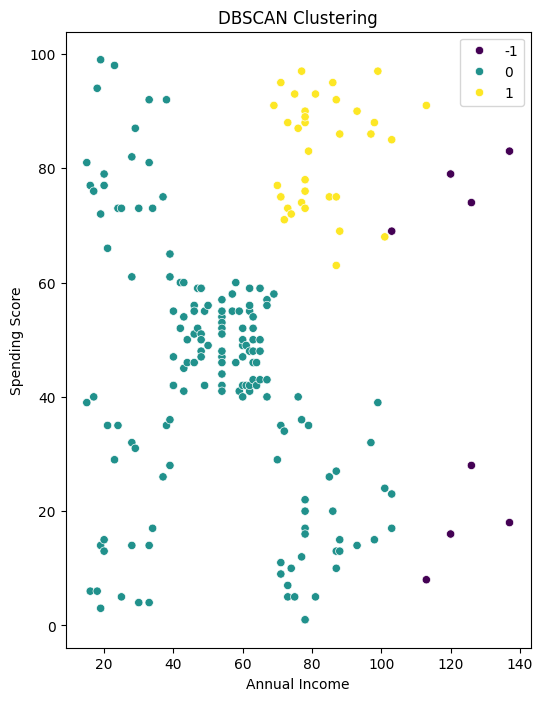

In [16]:
plt.figure(figsize=(6,8))
sns.scatterplot(x=X[:,0],y=X[:,-1],hue=dbscan_cluster,palette="viridis")
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()